## Problem Set 3: Household Expenditures and The Supplemental Nutrition Assistance Program<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)

**Harvard University**<br/>
**Spring 2023**<br/>
**Instructor**: Gregory Bruich, Ph.D.

- Posted on: 02/07/2023
- Due at: 11:59pm on 02/14/2023 <3


<a name="cite_note-1"></a>[1.](#cite_ref-1) Background information is from Bruich (2014)

<hr style="height:2.4pt">

### Suggested Imports

In [119]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer

### Background

The Food Stamp Program (now called the Supplemental Nutrition Assistance Program or SNAP) provides income to low-income households each month with the stated goal of helping them buy food. In April 2014, the average SNAP household consisted of just over two people and received $256 in benefits per month. SNAP benefits are restricted in that they can only be used to pay for certain food items purchased at retailers that have applied for and received authorization to
participate in the program from the U.S. Department of Agriculture. Excluded items include alcohol, hot foods, and toiletries. 

There are two ways for a household to become eligible for SNAP. The first way is if all members of the household receive benefits through either the Supplemental Security Income program,<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2) the Temporary Assistance for Needy Families program, or a county general assistance program. The second way is if household income and assets are below certain thresholds. Income and assets are measured the month prior to applying for benefits and are re-assessed at periodic intervals (typically 6 months). In addition, there are minimum work requirements (20 hours per week) for non-disabled adults between 18 and 50 years old without children. SNAP benefits may only be received by adults who do not meet this work requirement for three months out of the previous three years. Beneficiaries can often substitute work training or volunteering for the work
requirement.

Table 1 describes the variables included in the stata dataset `snap.dta`. The dataset is an extract
from the National Household Food Acquisition and Purchase Survey (FoodAPS) from the U.S. Department of Agriculture (USDA). The sample is restricted to households receiving SNAP benefits. Survey respondents kept track of all food items purchased over a 24 hour period.

The survey responses were merged with administrative data from the SNAP program, allowing us to measure the exact number of days since the household received its SNAP benefits. Spending and days since receipt of SNAP will be the main variables we utilize in this problem set, although we will also control for various other household level variables (e.g., the number of people in the household, whether the household owns a vehicle, whether the primary respondent has a high school education).

<a name="cite_note-2"></a>[2.](#cite_ref-2) An exception is that in California, Supplemental Security Income payments have included an additional cash amount for food stamp benefits since 1974. Therefore, individuals in California who receive Supplemental Security Income cannot also receive SNAP benefits separately.


<hr style="height:2.4pt">


### Data Description
**File**: `snap.dta`

The data consist of $n=1215$ households from National Household Food Acquisition and Purchase Survey (FoodAPS) from the U.S. Department of Agriculture (USDA). All households are SNAP recipients.

**Table 1: Definitions of Selected Variables in `snap.dta`**

| Variable          | Description                                                              | N     | Mean   |
| ----------------- | ------------------------------------------------------------------------ | ----- | ------ |
| (1)               | (2)                                                                      | (3)   | (4)    |
|                   |                                                                          |       |        |
| `hhnum`           | 6-digit unique identifier for each household                             | 1,215 | n/a    |
| `spending`        | Total amount spent ($) on both food away from home and food at home      | 1,215 | $21.80 |
| `days`            | days since snap last received                                            | 1,215 | 14.01  |
| `week1`           | 1st week of SNAP benefit month                                           | 1,215 | 0.321  |
| `week2`           | 2nd week of SNAP benefit month                                           | 1,215 | 0.233  |
| `week3`           | 3rd week of SNAP benefit month                                           | 1,215 | 0.230  |
| `week4`           | 4th week of SNAP benefit month                                           | 1,215 | 0.216  |
| `anyvehicle`      | whether anybody in household owns or leases a vehicle (y/n)              | 1,215 | 0.724  |
| `hhsize`          | number of people at residence, excluding guests                          | 1,215 | 3.420  |
| `primstoretime_d` | driving time, in minutes, between residence and primary food store       | 1,215 | 8.512  |
| `white`           | Primary respondent is White                                              | 1,215 | 0.645  |
| `black`           | Primary respondent is Black                                              | 1,215 | 0.207  |
| `asian`           | Primary respondent is Asian or Native Hawaiian or Other Pacific Islander | 1,215 | 0.0156 |
| `hispanic`        | Primary respondent is Hispanic                                           | 1,215 | 0.246  |
| `highschool`      | Primary respondent has high school education                             | 1,215 | 0.720  |

*Notes:* Table defines the variables from the FoodAPS data.


<hr style="height:2.4pt">

### Data Load

In [2]:
# Read dataset into a pandas dataframe
data = pd.read_stata("snap.dta")

# Display first 5 rows of data
data.head()

,hhnum,spending,snap_amount,days,week1,week2,week3,week4,anyvehicle,hhsize,primstoretime_d,white,black,asian,hispanic,highschool
0,100012,5.520000,125.0,27,0,0,0,1,1,5,2.37,1,0,0,0,1
1,100028,23.620001,725.0,17,0,0,1,0,1,7,4.23,1,0,0,0,0
2,100040,22.010000,225.0,6,1,0,0,0,1,2,5.72,0,0,0,1,1
3,100069,59.750000,175.0,17,0,0,1,0,1,4,5.15,0,0,0,0,1
4,100076,30.650000,325.0,27,0,0,0,1,1,4,8.75,1,0,0,0,1


<hr style="height:2.4pt">

### Instructions

Please submit your Problem Set on Canvas. Your submission should include two files:
1. This notebook as a `.ipynb` file with your code and answers to questions
2. A `.pdf` version of this notebook. TODO: Provide general instructions on converting `.ipynb` to `pdf`

<hr style="height:2.4pt">

### Questions

*Note: Short answers should be very succinct. Show your work and intuition clearly: credit is given for explanations and not just having the correct answer*

### 1

Estimate the following regressions and generate a table of the results using `stargazer`. Report appropriate standard errors for each regression, and
explain how you decided which standard errors to use.

You will have to generate new variables: the square of `days`, natural log of `spending` and
household size (`hhsize`), as well as the interaction terms `week2` × `anyvehicle`, `week3` ×
`anyvehicle`, and `week4` × `anyvehicle`. See Table 2a and Table 2b for more guidance.

- a) Column 1: Regress `spending` in dollars on `days`, the square of `days`, the natural log of `hhsize`, the variable `highschool`, and the variable `anyvehicle`. In Greek:
$$Spending_i = \alpha_0 + \alpha_1days_i + \alpha_2log(hhsize_i) + \alpha_4highschool_i + \alpha_5Vehicle_i + u_i$$

- b) Column 2: Regress the natural log of `spending` on `days`, the square of `days`, the natural log of `hhsize`, the variable `highschool`, and the variable `anyvehicle`. In Greek:
$$log(Spending_i) = \alpha_0 + \alpha_1days_i + \alpha_2log(hhsize_i) + \alpha_4highschool_i + \alpha_5Vehicle_i + u_i$$

- c) Column 3: Regress the natural log of `spending` on the dummy variables `week2`, `week3`, and `week4`. Estimate this regression over the subset of observations **for whom `anyvehicle` equals 1**. In Greek:
$$log(Spending_i) = \alpha_0 + \alpha_1Week2_i + \alpha_2Week3_i + \alpha_3Week4_i + u_i$$

d. Column 4: Regress the natural log of `spending` on the dummy variables `week2`, `week3`, and `week4`. Estimate this regression over the subset of observations **for whom `anyvehicle` equals 0**. In Greek:
$$log(Spending_i) = \alpha_0 + \alpha_1Week2_i + \alpha_2Week3_i + \alpha_3Week4_i + u_i$$

e. Column 5: Regress the natural log of `spending` on the dummy variables `week2`, `week3`, `week4`, the variable `anyvehicle`, and new variables that equal `week2` × `anyvehicle`, `week3` × `anyvehicle`, and `week4` × `anyvehicle`. Estimate this regression over the full sample. In Greek:

$$\begin{aligned}
f(x)= & \alpha_0 + \alpha_1Week2_i + \alpha_2Week3_i + \alpha_3Week4_i + \alpha_4 Vehicle_i + \alpha_5 Week2_i \times Vehicle_i\\
& \alpha_6 Week3_i \times Vehicle_i + \alpha_7 Week4_i \times Vehicle_i + u_i
\end{aligned}$$

In [3]:
data['days_squared'] = data['days'].apply(lambda x: x**2)
data['log_hhsize'] = np.log(data['hhsize']).replace(-float('inf'), np.nan)
data['log_spending'] = np.log(data['spending']).replace(-float('inf'), np.nan);

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
# Regression 1
reg_1 = sm.ols('spending ~ days + days_squared + log_hhsize + highschool + anyvehicle', data=data)
res_1 = reg_1.fit(cov_type='HC2')
# # print(res_1.summary())

reg_2 = sm.ols('log_spending ~ days + days_squared + log_hhsize + highschool + anyvehicle ', data=data)
res_2 = reg_2.fit(cov_type='HC2')
# print(res_2.summary())

data_subset = data.loc[data['anyvehicle'] == 1]
data_subset_2 = data.loc[data['anyvehicle'] != 1]

reg_3 = sm.ols('log_spending ~ week2 + week3 + week4', data=data_subset)
res_3 = reg_3.fit(cov_type='HC2')
# print(res_3.summary())

reg_4 = sm.ols('log_spending ~ week2 + week3 + week4', data=data_subset_2)
res_4 = reg_4.fit(cov_type='HC2')
# print(res_4.summary())

reg_5 = sm.ols('log_spending ~ week2 * anyvehicle + week3 * anyvehicle + week4 * anyvehicle', data=data)
res_5 = reg_5.fit(cov_type='HC2')
# print(res_5.summary())

table = Stargazer([res_1, res_2, res_3, res_4, res_5])
table.covariate_order(['Intercept','anyvehicle', 'days', 'days_squared', 'highschool', 'log_hhsize', 'week2', 'week3', 'week4', 'week2:anyvehicle', 'week3:anyvehicle', 'week4:anyvehicle'])
table.custom_columns(['Dep: Spending', 'Dep: log_spending', 'Dep: log_spending', 'Dep: log_spending', 'Dep: log_spending'], [1, 1, 1, 1, 1])
table.add_custom_notes(["The Standard errors reported in parentheses are heteroskedasticity robust (HC2)."])
table
table

<h3> Answer </h3>
<p> Decided upon using the HC2 formula for calculating standard error, because they work when unequal variance is given, and are more consistent than the HC1 </p>

<hr style="height:2.4pt">

### 2

The number of observations in **Column 1** is greater than in **Column 2**. Why?

In [5]:
reg = sm.ols('spending ~ days + np.log(hhsize) + highschool + anyvehicle', data=data, missing='drop')
index_1 = reg.data.missing_row_idx
print(f'There {len(index_1)} observations being dropped in regression 1.')

reg_2 = sm.ols('log_spending ~ days + log_hhsize + highschool + anyvehicle + week2 ', data=data, missing='drop')
index_2 = (reg_2.data.missing_row_idx)
print(f'There {len(index_2)} observations being dropped in regression 2.')

There 0 observations being dropped in regression 1.
There 458 observations being dropped in regression 2.


Statsmodels drops observations if one of their regressor fields is missing data. We can find 458 observation that are being dropped in the second column. What we find is that all those observations have a log-spending that is $-\infty$ and we declared them as NAN. Hence, they are not used in the regression.

In [6]:
missing = data.iloc[index_2]
missing.isna().sum()
# missing['log_spending'].value_counts()

hhnum                0
spending             0
snap_amount         40
days                 0
week1                0
week2                0
week3                0
week4                0
anyvehicle           0
hhsize               0
primstoretime_d      0
white                0
black                0
asian                0
hispanic             0
highschool           0
days_squared         0
log_hhsize           0
log_spending       458
dtype: int64

<hr style="height:2.4pt">

### 3
Interpret the coefficient on log household size 
- (i) in column 1 and 
- (ii) in column 2

in words.

<p> Formulas for columns 1 and 2 </p>
<ol> 
    <li> $$Spending_i = \alpha_0 + \alpha_1days_i + \alpha_2log(hhsize_i) + \alpha_4highschool_i + \alpha_5Vehicle_i + u_i$$ </li>
    <li> $$log(Spending_i) = \alpha_0 + \alpha_1days_i + \alpha_2log(hhsize_i) + \alpha_4highschool_i + \alpha_5Vehicle_i + u_i$$ </li>
</ol>

<strong> Answer: </strong>
<ol>
    <li> A 1% change in household size is on average associated with a change of $0.01 * 8.003 = 0.08003$ (where, $ \beta_1 = 8.003$) in spending on food at home and away, holding all else constant.  </li>
    <li> A 1% change in household size is on average associated with a change of 0.234 in spending on food at home and away, holding all else constant. </li>
</ol>

<hr style="height:2.4pt">

### 4
Use the regression in column 2 of your table to do the following:
- a) Calculate the predicted effect of increasing days from $days = 1$ to $days = 2$
- b) Calculate the standard error of the predicted effect by hand. Does your regression output table have all the information needed to calculate this standard error? Explain why or why not. (You can check your answer using `lincom`).
- c) Calculate a 95% confidence interval for your predicted effect by hand. (You can check your answer using lincom).

Note: you may use Stata/R (or a calculator) to help with your calculations in (b) and (c), but you should write out the formula you use with the appropriate values plugged in.

<h2> 4a) </h2>

In [86]:
import statsmodels.api as smf

reg_pred = sm.ols('log_spending ~ anyvehicle + days + days_squared + highschool + log_hhsize', data=data)
reg_pred_res = reg_pred.fit(cov_type='HC2')
# y_pred_1 = pd.DataFrame(np.ones(5), columns=['anyvehicle', 'days', 'days_squared', 'highschool', 'log_hhsize'])
y_pred_2 = np.ones(5)
y_pred_2 = data.iloc[45]
y_pred_2 = np.column_stack(y_pred_2)
y_pred_2 = smf.add_constant(y_pred_2)

x = data[['anyvehicle', 'days', 'days_squared', 'highschool', 'log_hhsize']]
row = pd.DataFrame(x.iloc[0])
row = row.T
row['days'] = float(1)
row['days_squared'] = float(1)

X = pd.DataFrame(np.repeat(row.values, 2, axis=0), columns=['anyvehicle', 'days', 'days_squared', 'highschool', 'log_hhsize'])
X.iloc[1]['days'] = float(2)
X.iloc[1]['days_squared'] = float(4)
print(X)

pred = reg_pred_res.predict(X)

   anyvehicle  days  days_squared  highschool  log_hhsize
0         1.0   1.0           1.0         1.0    1.609375
1         1.0   2.0           4.0         1.0    1.609375


In [87]:
# difference in predictions 
dif = pred[0] - pred[1]
print(dif)

0.07331506572873048


The predicted effect from day 1 to day 2 is $ \Delta Y_i = 0.07332$

Important to note here that the predicted effect depends on the initial level of our x values (explanatory variable).

<h2> 4b) Calculating Standard Errors per hand </h2>

In [154]:
print(res_2.summary())
cov_matrix = res_2.cov_params()
cov_x1_x2 = cov_matrix.days.days_squared
print(f'The covariance between beta_1 and beta_2 is {cov_x1_x2:.8f}')

                            OLS Regression Results                            
Dep. Variable:           log_spending   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     8.590
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           6.32e-08
Time:                        22:55:39   Log-Likelihood:                -1220.1
No. Observations:                 757   AIC:                             2452.
Df Residuals:                     751   BIC:                             2480.
Df Model:                           5                                         
Covariance Type:                  HC2                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.1643      0.179     17.689   

From section we know that $$Var(\beta_1 + (1+2x)\beta_2) = Var(\beta_1) + (1+2x)^2Var(\beta_2) + 2(1+2x)Cov(\beta_1, \beta_2) $$
So let's calculate the standard error for a x = 1, which is a one-unit change from 1% to 2% we get

$$Var(\beta_1 + 1\beta_2) = Var(\beta_1) + (3)^2Var(\beta_2) + 2(3)Cov(\beta_1, \beta_2)$$
$$Var(\beta_1 + 1\beta_2) = 0.020^2 + (3)^2* 0.001^2 + 2(3) * -0.00001194$$
$$Var(\beta_1 + 1\beta_2) = 0.00033736$$
$$SE(\beta_1 + 1\beta_2) = \sqrt{0.00033736} = 0.01836736235$$

In [103]:
# Let's confirm this result using code.
# print(res_2.bse)
var_beta_1 = (res_2.bse['days'])**2
var_beta_2 = (res_2.bse['days_squared'])**2
cov_matrix = res_2.cov_params()
cov_beta_1_beta_2 = cov_matrix.days.days_squared

var = var_beta_1 + (3**2) * var_beta_2 + 2*3*cov_beta_1_beta_2
se = np.sqrt(var)
# print(var)
print(f'Using the computer to calculate the standard error of the predicted effect we get {se: .4f}')

Using the computer to calculate the standard error of the predicted effect we get  0.0178


<h2> 4c) Calculate a 95% confidence interval for your predicted effect by hand. </h2>
<p> A 95% confidence interval can be computer with $\Delta \bar{Y} \pm 1.96 * \hat{SE}(\bar{Y})$

<strong> Answer: </strong> $$CI = \Delta \bar{Y} \pm 1.96 * 0.01837$$
$$CI = 0.07331 \pm 1.96 * 0.01837$$
$$CI = [0.0373048, 0.1093152] $$

In [111]:
# Let's do it via python as well
CI_lower = dif - (1.96 * se)
CI_upper = dif + (1.96 * se)
res = [CI_lower, CI_upper]
print(f'Python calculates the 95% confidence interval of the predicted effect to be [{res[0]:.4f}, {res[1]:.4f}]')

Python calculates the 95% confidence interval of the predicted effect to be [0.0384, 0.1082]


<hr style="height:2.4pt">

### 5

This question has to do with the regressions in columns 3, 4, and 5 of your table.
- a) Using the regression in column 4, interpret the coefficients on `week2`, `week3`, `week4` in words.
- b) Using the regression in column 5, interpret the coefficients on `week2`, `week3`, `week4` in words. How do these coefficients compare with the coefficients you reported in column 4?
- c) The “fully interacted regression” in column 5 provides exactly the same information as the regressions reported in column 4 and column 3. To see this, show that the sum of the coefficient on `week2` and `week2` × `anyvehicle` in column 5 exactly equals the coefficient on `week2` in column 3.
- d) What do you think is an advantage of estimating the regressions separately as in columns 3 and 4? What do you think is an advantage to estimating the fully interacted regression as in column 5?

<h2> 5a) </h2>
<p> Since the dependent variable is in log we use: a one-unit change in $x_1$ is associated with a $(100 * \beta_1)$ change in y, holding all else constant.

The average estimated effect of spending on food for week one given being in week one is $322.4$.

The average estimated effect of spending on food for week two given being in week two is $100 * (3.224 - 0.509) = 271.5$

The average estimated effect of spending on food for week three given being in week three is $100 * (3.224 - 0.981) = 224.3$

The average estimated effect of spending on food for week four given being in week four is $100 * (3.224 - 0.642) = 258.2$

</p>

<h2> 5b) </h2>
<p> Our regression model 5 includes the interaction terms between week and whether anybody in household owns or leases a vehicle. We can use the interaction term to understand whether there is a difference between somebody that owns a vehicle or not. So for example we could answer the question what is the predicted difference in the natural log of spending for someone having received their snap benefits 2 weeks ago and owning a vehicle vs not owning a vehicle. Mathematically this would look like this considering:
    $$\begin{aligned}
    f(x)= & \beta_0 + \beta_1Week2_i + \beta_2Week3_i + \beta_3Week4_i + \beta_4 Vehicle_i + \beta_5 Week2_i \times Vehicle_i\\
& \beta_6 Week3_i \times Vehicle_i + \beta_7 Week4_i \times Vehicle_i + u_i
\end{aligned}$$
    Since we are considering the difference in Week2 from owning/leasing a vehicle the equation becomes this:
$$ \Delta(Y_i) = \beta_0 + \beta_1Week2_i + \beta_2 Vehicle_i + \beta_3 Week2_i \times Vehicle_i +  u_i$$
    This then becomes this:
    $$ Y[Vehicle_i = 1| Week_2 = 1] - Y[Vehicle_i = 0| Week_2 = 1] = (\beta_0 + \beta_1Week2_i + \beta_2 Vehicle_i + \beta_3 Week2_i \times Vehicle_i) - (\beta_0 + \beta_1Week2_i + \beta_2 Vehicle_i + \beta_3 Week2_i \times Vehicle_i)$$ 
    Let's pull the equations apart to it becomes easier to read. We can plug in our estimated coefficients to obtain:
    $$ Y[Vehicle_i = 1 | Week_2 = 1] = (3.224 - 0.509 \times 1 - 0.131 \times 1 + 0.257 \times 1 \times 1) = 2.841$$
    $$ Y[Vehicle_i = 0| Week_2 = 1] =  (3.224 - 0.509 \times 1  -0.131 \times 0 + 0.257 \times 1 \times 0) = 2.715$$
    Finally, we calculate the difference:
    $$ \Delta Y_i = -0.131 $$
    
The interaction terms allow us to further condition on another variable the vehicle. Giving us insights into whether there is a difference for a given week between owning and not owning a vehicle, ultimately allowing us a better understanding of the relationship in the data.

# 5c)

$$ \beta_2 = \alpha_1 week_2 + \alpha_2 week_2:anyvehicle$$ where $\alpha$ coef come from column 5 and $\beta$ from column 3. Therefore we get:

$$ -0.252 = (-0.509 + 0.257)$$



<h2> 5d) </h2>
What do you think is an advantage of estimating the regressions separately as in columns 3 and 4? What do you think is an advantage to estimating the fully interacted regression as in column 5?

What comes to mind is the degree of complexity of my model and how to interpret it. Including interaction terms makes my model more complex, but if I understand my variables including interaction terms allows my model capture more of the relationships in my data. Including the interaction term allows me to understand the effect of each week on spending depending on another variable which is owning/leasing a car. So we could understand better that the level of spending differs for people owning/leasing a car.

On the other hand, including the fixed effects makes our model more complex, making it harder to interpret, and if we find a statistically insignificant interaction effect then they are merely show no difference between the groups.

In [101]:
table

# <hr style="height:2.4pt">

### 6

Using the regression in column 5, can you reject the null hypothesis the coefficients on `week2` × `anyvehicle`, `week3` × `anyvehicle`, and `week4` × `anyvehicle` are jointly zero?
- a) Report your *F* statistic, its *p*-value, the 5% critical value for the test, and number of restrictions for this test.
- b) Does the conclusion you draw from the 𝐹 test match the conclusion you would draw from *t*-tests of the significance of the coefficients individually? Explain.
- c) Give a qualitative interpretation of what the null hypothesis from the previous question means in words. This is a thinking question.

# 6a)

In [138]:
# Your Code Here
test_results = res_5.wald_test([
    'week2:anyvehicle = 0',
    'week3:anyvehicle = 0',
    'week4:anyvehicle = 0',
], scalar=True, use_f=True)

# collect f statistic
f_stat = test_results.fvalue
print(f'The calculated f-statistic value is {f_stat:.4f}')

#collect degrees of freedom
df = test_results.df_num

# Calculate true p-value
true_p = 1 - stats.chi2.cdf(f_stat * df, df)

# print(df)
print(f'The calculated p-value using the chi-square function is {true_p:.4f}')
#Calculate critical value:
# note we use 10^10 rather than infinity due to function
# constraints
INF = 10 ** 10
crit_val = stats.f.ppf(.95, df, INF)

print(f'The calculated critical value is {crit_val:.4f}')

The calculated f-statistic value is 1.7835
The calculated p-value using the chi-square function is 0.1479
The calculated critical value is 2.6049


<strong> Answer: </strong> Our calculated f-value is smaller then the critical value, hence we cannot reject the null hypothesis. The number of restrictions is 3.

# 6b)

In [140]:
t_stat = res_5.t_test([
    'week2:anyvehicle = 0',
    'week3:anyvehicle = 0',
    'week4:anyvehicle = 0',])
print(t_stat)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2572      0.285      0.902      0.367      -0.302       0.816
c1             0.6783      0.296      2.295      0.022       0.099       1.258
c2             0.3013      0.290      1.038      0.299      -0.268       0.870


<strong> Answer </strong> The t-test statistics for each hypothesis independently of one another suggests to reject the null hypothesis, except for week3:anyvehicle = 0 which it says we cannot reject. This is in contrast to the f-statiscs that considers the joint hypothesis and concludes that we cannot reject the null hypothesis.

# 6c)

<p> Question: Give a qualitative interpretation of what the null hypothesis from the previous question means in words. This is a thinking question. <p><br>

<p><strong> Answer: </strong> The null hypothesis stated that the interaction term between the $week_{2}:anyvehicle = 0$ and $week_{3}:anyvehicle = 0$ and $week_{4}:anyvehicle = 0$ is jointly zero. We can qualitatively interpret this as saying that in $week_{2,3,4}$ the difference in spending might differ but respectively is not different depending on whether one owns/leases a vehicle. In other words, if we cannot reject the null hypothesis then that indicates that there is no interaction effect between week and anyvehicle in our estimation. 

<hr style="height:2.4pt">

### 7
Suppose a policy maker is considering whether to fund a program that would make vehicles (zip cars) available to families receiving SNAP benefits. The policy maker would like to know if this program would increase spending on food. As we have discussed, policy questions like this are fundamentally “if-then” causal questions. Do you think that the coefficient on `anyvehicle` in column 1 measures the causal effect that the policy maker would want to know? If the coefficient does not measure the causal effect of interest, is the estimated coefficient too big or too small?

Hint: provide an example of an omitted variable, then use the omitted variable bias formula and use your knowledge of the world to infer the signs of the inputs to the formula.

eval_env: 1


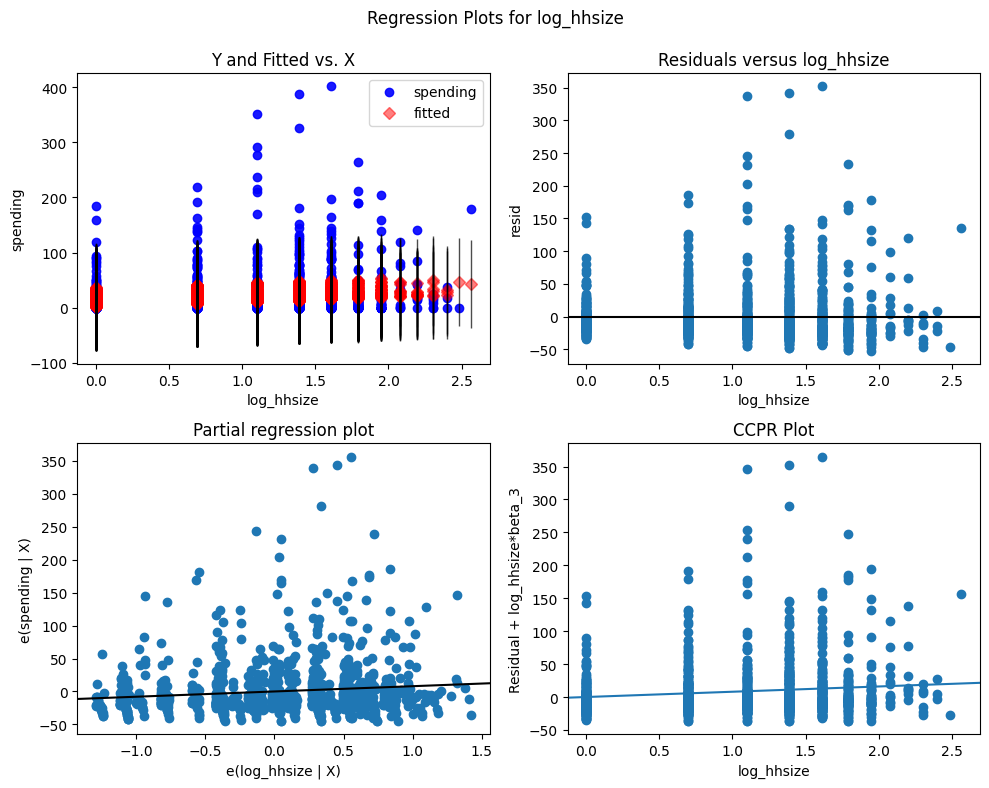

In [153]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(res_1, 'log_hhsize', fig=fig)
plt.show()

In order for us to be able to derive a casual effect form a regression we need conditional mean independence. Meaning that the conditional expectation of our error term does not dependent on our variable of interest anyvehicle, because we control on another variable. We can check for conditional mean independence by looking at the residuals, and if there are no relationships between the residuals and the dependent variable then conditional mean independence is given. Since, there appears to be somewhat of a relationship between log_hhsize and the dependent variable mean conditional independence is not given.

Lets apply the omitted variable bias formula and think about the effect that including the Distance to food stores would have on our regression. The further away one lifes from a food store such as a grocery store the more time intensive it becomes to get to a grocery store hence people might choose to spend more money on restaurants that are nearby. Following that logic the distance from a food store is negatively correlated with spending. Further, we would imagine that distance from a food store and owning a vehicle are correlated as well. If we were to take those things into account using the omitted variable bias we would conclude that the effect of owning/leasing a vehicle on spending is over estimated in our regression.

<hr style="height:2.4pt">

### Sample Code

Adds another column to a dataframe storing the squares of values in the original
```python
# Note: not using simpler method np.square() due to
# integer overflow
snap[“x_squared”] = snap.x.astype(int) ** 2
```

Adds another column to a dataframe storing the natural log of values in the original, replacing infinite values with NaNs.
```python
snap[“log_x”] = np.log(snap.x).replace(-float(“inf”),
np.nan)
```

Shows how to estimate an ordinary least squares regression with heteroskedasticity robust standard errors. Notice we specify that we wish to drop rows with missing data.
```python
mod = sm.ols(
    “yvar ~ xvar1 + xvar2 + xvar3”,
    data=snap,
    missing=”drop”
)
res = mod.fit(cov_type=”HC2”)
```

Create a new dataframe that is a subset of the rows of the original where the xvar is equal to 5.
```python
five_df = snap.loc[snap.xvar == 5]
```

These lines show how to make a regression table with three columns, corresponding to
- A regression of some variable yvar1 on xvar1, xvar2, and xvar3
- A second regression of yvar1 on just xvar1 and xvar2
- A third regression with a different dependent variable regressing yvar2 on xvar2 and xvar3
Note we have to label the columns manually here. Also note we add an extra row to the bottom of the table and manually add entries
```python
# Estimate Regressions:
mod1 = sm.ols(
    “yvar1 ~ xvar1 + xvar2 + xvar3”,
    data=health
)
res1 = mod.fit(cov_type=”HC2”)

mod2 = sm.ols(
    “yvar1 ~ xvar1 + xvar2”,
    data=health
)
res2 = mod.fit(cov_type=”HC2”)

mod3 = sm.ols(
    “yvar2 ~ xvar2 + xvar3”,
    data=health
)
res3 = mod.fit(cov_type=”HC2”)

# Create Table
table = Stargazer(models)

# Label columns
# This list of 1s should be the same length as the
# number of columns
table.custom_columns([“yvar1”, “yvar1”, “yvar2”],
seperators=[1, 1, 1])

# Add custom row at bottom of table:
table.add_line(“Sample:”, [“hello”, “hi”, “hey”])

# Display table
table
```



Shows how to access the coefficients and covariance matrix of regression result
```python
# Access coefficient on xvar1
alpha_1 = res.params.xvar1
# Access covariance matrix of result
cov_matrix = res.cov_params()
# Access covariance between xvar1 and xvar2:
cov_x1_x2 = cov_matrix.xvar1.xvar2
```


Shows how to run an F test that variables xvar1, xvar2, and xvar3 are not all 0 on a regression result
```python
# Run Test
test_results = res.wald_test([
    “xvar1 = 0”,
    “xvar2 = 0”,
    “xvar3 = 0”,
], scalar=True, use_f=True)

# collect f statistic
f_stat = test_results.fvalue

#collect degrees of freedom
df = test_results.df_num
Calculate true p-value
true_p = 1 – stats.chi2.cdf(fstat * df, df)

#Calculate critical value:
# note we use 10^10 rather than infinity due to function
constraints
INF = 10 ** 10
crit_val = stats.f.ppf(.95, df, INF)
```